# Introducción

El objetivo principal de los algoritmos de _matching_ es el de, dado un fragmento de texto, encontrar, de entre un conjunto de candidatos, los textos más similares al fragmento orginial.

Como texto podemos pensar tanto en palabras, en pequeñas frases o en documentos enteros.

Podemos pensar en 3 tipos de técnicas de matching:
- **Coincidencia exacta**: ya vimos ejemplos de este tipo al estudiar la **Distancia de Edición**.
    - A nivel de carácter: strings que difieren en caracteres
    - A nivel de token: strings que difieren en palabras
    - Fonéticos: palabras que suenan de manera similar
- **Coincidencia aproximada o difusa**
- **Coincidencia mediante aproximaciones**

| Candidato / Tipo de resultado 	| Exacta 	| Aproximada 	| Transformación 	|
|-	|-	|-	|-	|
| String 	| Comparación de strings 	| Comparación difusa 	| Ontologías 	|
| Categoría 	| Gramáticas 	| Reconocimiento probabilístico 	| Análisis de topics 	|
| Documento 	| - 	| Recuperación de información 	| Traducción automática 	|

# Regular expressions (Regex)

Muy utilizadas (y conocidas) suelen emplearse al limpiar el texto o buscar formatos dentro del texto. A modo introductorio, las expresiones regulares son una forma de finite state automaton.

<img src=http://www.cs.cornell.edu/courses/cs312/2006fa/recitations/images/dfa-examples.gif>

Son grafos que siguen una secuencia que nosotros definimos. Por ejemplo, el grafo de la izquierda, solo podría generar expresiones como ab, abb, abbb, abbbb y así hasta el infinito. El de la derecha, podría generar expresiones como abcb, o abbb, abbbbbb, por ejemplo.

Conceptualmente, las regex _funcionan_ así _por debajo_. Lógicamente cuando las usamos es mucho más fácil, ¿verdad :D?

La definición de estos grafos es posible mediante la [librería de Python re](https://docs.python.org/3/library/re.html), módulo del paquete base de Python dedicado a las expresiones regulares.

Cierto es que no siempre nos hará falta. Algunas veces con un simple _string.replace()_ o _string.find()_ tendremos suficiente. No obstante, para muchas tareas son bastante útiles.

Algunas tareas típicas en las que se utilizan son la búsqueda (y a veces normalización) de emails, urls, numeros de telefono, etc. Solo la extracción es interesante, pero mediante su normalización nos permite reducir la cardinalidad del vocabulario y asociar entidades similares a un mismo alias.

[Regex Online](https://regexr.com/) es uno de los mejores recursos online para visualizar que hacen los regex

Veamos algunos ejemplos.

In [ ]:
# Función que nos ayudará a visualizar algunos resultados

from termcolor import colored
def test_pass(ok, text):
    color = 'green' if ok else 'red'
    return colored(text, color) 

In [ ]:
import re

In [ ]:
text = 'Todos los animales son iguales, pero algunos son más iguales que otros'

In [ ]:
RE_TEST = re.compile(r'todos')
print(RE_TEST.match(text))

In [ ]:
RE_TEST = re.compile(r'Todos')
print(RE_TEST.match(text))

In [ ]:
RE_TEST = re.compile(r'[Tt]od')
print(RE_TEST.match(text))

In [ ]:
RE_TEST = re.compile(r'\bTodos\b')
print(RE_TEST.match(text))

In [ ]:
RE_TEST = re.compile(r'\bTod\b')
print(RE_TEST.match(text))

## Obtener un correo electrónico

In [ ]:
"""
^ -> start of string
+ -> match 1 or more preceding regex
[^@]+
@[^@]+
\. -> '.'
"""

RE_EMAIL = re.compile('[^@]+@[^@]+\.[^@]+')

In [ ]:
emails_list = [
    '@invalid@adress.com',
    'correo_valido@gmail.com',
    'notan@valido@gmail.com',
    'si.valido.david@gmail.com',
    'paginaweb.com',
    'paginaweb.com@paginaweb.com'
]
for email in emails_list:
    if RE_EMAIL.match(email):
        print(test_pass(True, email))
    else:
        print(test_pass(False, email))

## Obtener precios

In [ ]:
from random import shuffle
import unicodedata

CURRENCIES = ''.join(chr(i) for i in range(0xffff) if unicodedata.category(chr(i)) == 'Sc')
RE_MONEY_GENERAL= re.compile('((\s|^)([\d]*)(\.)?([\d])*([%s]|e|USD|USD\$|U\$D)(\s|$))'
                          '|((\s|^)([%s]|e|USD|USD\$|U\$D)([\d])*(\.)?([\d])*(\s|$))'%(CURRENCIES, CURRENCIES), re.IGNORECASE)
RE_MONEY_EU= re.compile('((\s|^)([\d]{0,3}([\.][\d]{3})(,[\d]*))([%s]|e|(USD|USD\$|U\$D))(\s|$))'
                     '|((\s|^)([%s]|e|(USD|USD\$|U\$D))([\d]{0,3}([\.][\d]{3})(,[\d]*))(\s|$))'%(CURRENCIES, CURRENCIES), re.IGNORECASE)
RE_MONEY_EU_INVERSE= re.compile('((\s|^)([\d]{0,3}([,][\d]{3})(\.[\d]*))([%s]|e|(USD|USD\$|U\$D))(\s|$))'
                             '|((\s|^)([%s]|e|(USD|USD\$|U\$D))([\d]{0,3}([,][\d]{3})(\.[\d]*))(\s|$))'%(CURRENCIES, CURRENCIES), re.IGNORECASE)


In [ ]:
correct_currencies = [
    '$20.2',
    '$.2',
    '$0.2',
    '$3433.2',
    '.2$',
    '2.0$',
    '2.$',
    '2.0€',
    '2¥',
    '20USD',
    '20e',
    '20 €',
    '20 usd',
    '€200.123,2',
    '2.134,56$',
    '23232₽',
    '334,222.20€',
    '20U$D',
    '$200']

incorrect_currencies = [
    'asdfsd', 
    '$asdasd', 
    '23333,444.20€',
    '€34523sdfas', 
    '€213.sd', 
    '$3vg554.25', 
    'expensive', 
    'cheap', 
    '2342,222.90€'
]

all_currencies = correct_currencies + incorrect_currencies
shuffle(all_currencies)

for currency in all_currencies:
    if RE_MONEY_GENERAL.match(currency) or RE_MONEY_EU.match(currency) or RE_MONEY_EU_INVERSE.match(currency):
        print(test_pass(True, currency))
    else:
        print(test_pass(False, currency))

# DAWG

Lo presentábamos antes de manera muy  rápida, un _Directed Acyclic Word Graph_ (por sus siglas, DAWG), también llamado, _Deterministic Acyclic Finite State Automaton_ (DAFSA), es un tipo de estructura de datos que permite representar datos de tipo texto y realizar consultas.

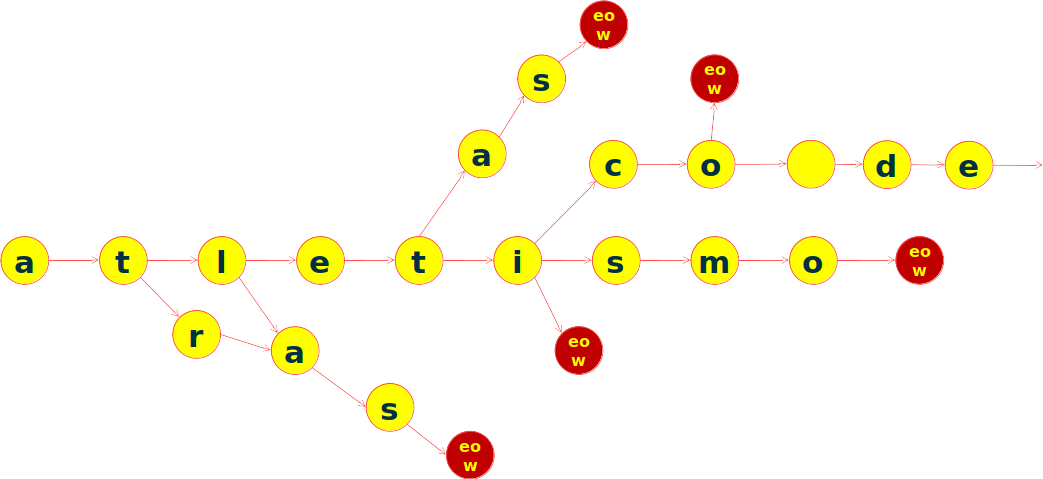

En el grafo generado se distinguen:
- **Nodos**: un carácter / símbolo
- **Vértices**: enlace con el siguiente carácter / símbolo más probable

## Ejemplos

In [ ]:
import sys
sys.path.append('../..')

from utils import load_movie_titles

In [ ]:
datasets_path = '../../datasets'
movie_titles_file = 'films.txt'

In [ ]:
movies_titles = load_movie_titles(datasets_path, movie_titles_file)

In [ ]:
movies_titles

## Lo creamos

In [ ]:
!pip install pyDAWG

In [ ]:
from pydawg import DAWG

In [ ]:
dawg = DAWG()

for w in sorted(m.title for m in movies_titles):
    dawg.add_word_unchecked(w)

In [ ]:
import random

In [ ]:
t = random.choice(movies_titles).title
t

In [ ]:
t in dawg

## Operaciones

### Búsqueda por prefijo

In [ ]:
for m in dawg.find_all('Batman'):
    print(m)

### Prefijo más largo 

In [ ]:
s = 'La guerra de nunca jamás'
pfx = dawg.longest_prefix(s)
print( s[:pfx])

### Búsqueda en una oración

In [ ]:
def token_match(dawg, tknlist):
    for n in range(len(tknlist), 0, -1):
        test_str = ' '.join(tknlist[:n])
        if test_str in dawg:
            return test_str

def token_match_all(dawg, utterance):
    tknlist = utterance.split()
    return [token_match(dawg, tknlist[chunk:])
             for chunk in range(len(tknlist))]

In [ ]:
token_match_all(dawg, 'Donde echan Batman y Robin esta noche')

### Minimal perfect hash

In [ ]:
dawg.word2index('Batman')

# Distancia entre textos

[Jellyfish](https://jellyfish.readthedocs.io/en/latest/) es una librería que contiene funciones para el cálculo de similitud entre textos. Dicha similitud puede ser á nivel léxico-gráfico (strings) o fonético.


Algoritmos de comparación de strings:

- Levenshtein Distance
- Damerau-Levenshtein Distance
- Jaro Distance
- Jaro-Winkler Distance
- Match Rating Approach Comparison
- Hamming Distance

Algoritmos de encoding fonético:

- American Soundex
- Metaphone
- NYSIIS (New York State Identification and Intelligence System)
- Match Rating Codex


In [ ]:
# !pip3 install jellyfish
import jellyfish

## Levenshtein

Recordemos: distancia de Edit (Edición) en la que las operaciones permitidas son la inserción, la eliminación y la sustitución.

In [ ]:
jellyfish.levenshtein_distance('Cisne negro', 'Cisne negro')

In [ ]:
jellyfish.levenshtein_distance('Cisne negro', 'Cisne negor')

In [ ]:
jellyfish.levenshtein_distance('Cisne negro', 'Cisne nego')

In [ ]:
jellyfish.levenshtein_distance('Cisnee negro', 'Cisne nego')

In [ ]:
jellyfish.levenshtein_distance('Cisneee negro', 'Cisne nego')

## Damerau-Levenshtein

Recordemos: distancia de Edit (Edición) en la que las operaciones permitidas son la inserción, la eliminación y la transposición de 2 caracteres adyacentes.

In [ ]:
jellyfish.damerau_levenshtein_distance('Cisne negro', 'Cisne negro')

In [ ]:
jellyfish.damerau_levenshtein_distance('Cisne negro', 'Cisne negor')

In [ ]:
jellyfish.damerau_levenshtein_distance('Cisne negro', 'Cisne nego')

In [ ]:
jellyfish.damerau_levenshtein_distance('Cisnee negro', 'Cisne nego')

In [ ]:
jellyfish.damerau_levenshtein_distance('Cisneee negro', 'Cisne nego')

## Jaro distance

Recordemos: distancia de Edit (Edición) en la que la operacion permitida es la transposición.

In [ ]:
jellyfish.jaro_distance('Cisne negro', 'Cisne nego')

In [ ]:
jellyfish.jaro_distance('Cisnee negro', 'Cisne nego')

In [ ]:
jellyfish.jaro_distance('Cisneee negro', 'Cisne nego')